In [12]:
import pandas as pd

DataframeL = pd.read_csv(r"D:\Pythun projexx\Salaries\LiverpoolSalary.csv", thousands=',')
print(DataframeL)
DataframeM = pd.read_csv(r"D:\Pythun projexx\Salaries\ManCitySalary.csv", thousands=',')
print(DataframeM)

    Rank                  Player  Annual Salary
0      1           Mohamed Salah       18200000
1      2         Virgil van Dijk       11440000
2      3  Trent Alexander-Arnold        9360000
3      4        Andrew Robertson        8320000
4      5         Federico Chiesa        7800000
5      6        Ryan Gravenberch        7800000
6      7     Alexis Mac Allister        7800000
7      8          Alisson Becker        7800000
8      9              Diogo Jota        7280000
9     10            Darwin Núñez        7280000
10    11              Cody Gakpo        6240000
11    12      Dominik Szoboszlai        6240000
12    13               Joe Gomez        4420000
13    14   Konstantinos Tsimikas        3900000
14    15         Ibrahima Konate        3640000
15    16      Nathaniel Phillips        3380000
16    17               Luis Díaz        2860000
17    18             Wataru Endo        2600000
18    19         Stefan Bajcetic        2080000
19    20          Harvey Elliott        

In [14]:
Liverpool_salaries = DataframeL["Annual Salary"].astype(float) #float so it detects as numbers
print(Liverpool_salaries)
ManCity_salaries = DataframeM["Annual Salary"].astype(float)
print(ManCity_salaries)

0     18200000.0
1     11440000.0
2      9360000.0
3      8320000.0
4      7800000.0
5      7800000.0
6      7800000.0
7      7800000.0
8      7280000.0
9      7280000.0
10     6240000.0
11     6240000.0
12     4420000.0
13     3900000.0
14     3640000.0
15     3380000.0
16     2860000.0
17     2600000.0
18     2080000.0
19     2080000.0
20     1560000.0
Name: Annual Salary, dtype: float64
0     27300000.0
1     20800000.0
2     15600000.0
3     15600000.0
4     15340000.0
5     13000000.0
6     11960000.0
7     11700000.0
8     11440000.0
9     10400000.0
10     9360000.0
11     9360000.0
12     9100000.0
13     8320000.0
14     7800000.0
15     7800000.0
16     6760000.0
17     5200000.0
18     4680000.0
19     2600000.0
20     2600000.0
Name: Annual Salary, dtype: float64


In [16]:
import numpy as np

Liverpool_array = Liverpool_salaries.to_numpy()
ManCity_array = ManCity_salaries.to_numpy()
X_salaries = np.array([Liverpool_array, ManCity_array]).T
print(X_salaries)

[[18200000. 27300000.]
 [11440000. 20800000.]
 [ 9360000. 15600000.]
 [ 8320000. 15600000.]
 [ 7800000. 15340000.]
 [ 7800000. 13000000.]
 [ 7800000. 11960000.]
 [ 7800000. 11700000.]
 [ 7280000. 11440000.]
 [ 7280000. 10400000.]
 [ 6240000.  9360000.]
 [ 6240000.  9360000.]
 [ 4420000.  9100000.]
 [ 3900000.  8320000.]
 [ 3640000.  7800000.]
 [ 3380000.  7800000.]
 [ 2860000.  6760000.]
 [ 2600000.  5200000.]
 [ 2080000.  4680000.]
 [ 2080000.  2600000.]
 [ 1560000.  2600000.]]


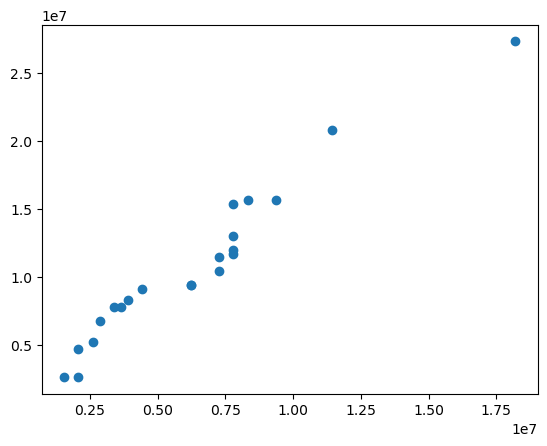

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X_salaries[:,0],X_salaries[:,1])

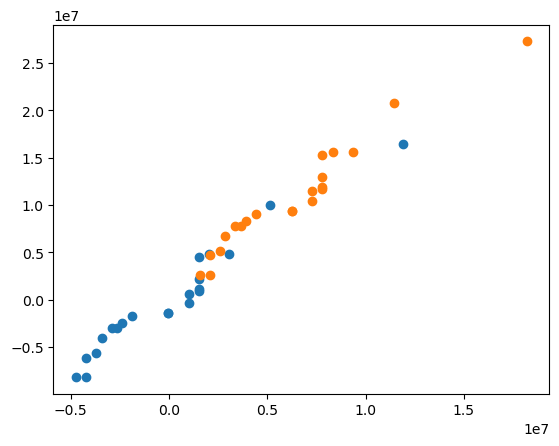

In [20]:
X_meaned=X_salaries-np.mean(X_salaries, axis=0)
plt.figure
plt.scatter(X_meaned[:,0], X_meaned[:,1])
plt.scatter(X_salaries[:,0], X_salaries[:,1])

In [31]:
C=np.cov(X_meaned, rowvar=False)
print(C)

[[1.50451848e+13 2.22772581e+13]
 [2.22772581e+13 3.48655048e+13]]


In [33]:
eval, evec=np.linalg.eig(C)
print(eval)
print(evec)

[5.73230426e+11 4.93374591e+13]
[[-0.83858572 -0.54476966]
 [ 0.54476966 -0.83858572]]


In [37]:
sorted_index=np.argsort(eval)[::-1]
sorted_eval=eval[sorted_index]
sorted_evec=evec[:,sorted_index]

In [39]:
n=1
evec_subset=sorted_evec[:,0:n]
print(evec_subset)

[[-0.54476966]
 [-0.83858572]]


In [41]:
X_reduced=np.dot(evec_subset.transpose(), X_meaned.transpose()).transpose()
print(X_reduced)

[[-20328325.13311417]
 [-11194875.02186901]
 [ -5701108.36081238]
 [ -5134547.91458129]
 [ -4633235.40303602]
 [ -2670944.80716852]
 [ -1798815.65344963]
 [ -1580783.36501991]
 [ -1079470.85347464]
 [  -207341.69975575]
 [  1231347.90019423]
 [  1231347.90019423]
 [  2440860.96952836]
 [  3378238.05793308]
 [  3955942.7463503 ]
 [  4097582.85790807]
 [  5252992.2347425 ]
 [  6702826.07687861]
 [  7422170.8768536 ]
 [  9166429.18429138]
 [  9449709.40740693]]


In [43]:
means = np.mean(X_salaries, axis=0)
X_reduced_unshifted = X_reduced + means

print("Unshifted reduced data:")
print(X_reduced_unshifted)

Unshifted reduced data:
[[-14038801.32359036  -9532134.65692369]
 [ -4905351.2123452    -398684.54567854]
 [   588415.44871143   5095082.1153781 ]
 [  1154975.89494252   5661642.56160919]
 [  1656288.40648779   6162955.07315446]
 [  3618579.00235529   8125245.66902196]
 [  4490708.15607418   8997374.82274085]
 [  4708740.4445039    9215407.11117057]
 [  5210052.95604917   9716719.62271584]
 [  6082182.10976806  10588848.77643473]
 [  7520871.70971804  12027538.37638471]
 [  7520871.70971804  12027538.37638471]
 [  8730384.77905217  13237051.44571884]
 [  9667761.86745689  14174428.53412355]
 [ 10245466.55587411  14752133.22254077]
 [ 10387106.66743188  14893773.33409854]
 [ 11542516.04426631  16049182.71093298]
 [ 12992349.88640242  17499016.55306908]
 [ 13711694.68637741  18218361.35304408]
 [ 15455952.99381519  19962619.66048186]
 [ 15739233.21693074  20245899.8835974 ]]


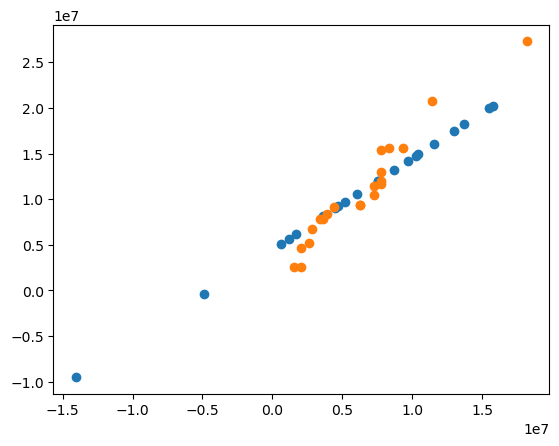

In [45]:
plt.figure()
plt.scatter(X_reduced_unshifted[:,0], X_reduced_unshifted[:,1])
plt.scatter(X_salaries[:,0], X_salaries[:,1])
plt.show()